In [100]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder




In [101]:
# Load Iris dataset
data = pd.read_csv('Downloads/iris/iris.data')
numeric_data = data.select_dtypes(include=[np.number])

# Extract features (excluding the last column)
X = numeric_data.iloc[:, :-1].values
class_labels = data.iloc[:, -1].values

# Convert class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
actual_labels = label_encoder.fit_transform(class_labels)

In [102]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [103]:
X

array([[4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3, 1.3],
       [4.4, 3.2

In [104]:
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [105]:
actual_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [106]:
data.shape[0]

149

In [107]:
data.shape[1]

5

In [108]:
# Step 1: Initialization of Population
def initialize_population(n, k, population_size):
    """
    Initializes a population of potential clustering solutions.

    Parameters:
    - n: Number of data points.
    - k: Maximum number of clusters.
    - population_size: Size of the population.

    Returns:
    - Population matrix where each row represents a chromosome.
    """
    return np.random.randint(1, k+1, size=(population_size, n + 1))


In [109]:
# Step 2: Crossover
def crossover(parent1, parent2):
    """
    Applies crossover to create two new chromosomes from two parents.

    Parameters:
    - parent1: First parent chromosome.
    - parent2: Second parent chromosome.

    Returns:
    - Two new chromosomes created through crossover.
    """
    crossover_point = np.random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

In [110]:
# Step 2: Mutation
def mutation(chromosome, k, data):
    """
    Applies mutation to a chromosome to introduce variation.

    Parameters:
    - chromosome: The chromosome to be mutated.
    - k: Maximum number of clusters.
    - data: The dataset.

    Returns:
    - Mutated chromosome.
    """
    mutated_chromosome = chromosome.copy()
    mutation_point = np.random.randint(len(chromosome) - 1)
    
    # Example mutation: Change label of a data point to the label of the closest cluster
    if mutation_point < len(chromosome) - 1:
        mutated_chromosome[mutation_point] = find_closest_cluster_label(mutated_chromosome, mutation_point, data)
    
    return mutated_chromosome


In [111]:
# Helper function for mutation: Find the label of the closest cluster to a data point
def find_closest_cluster_label(chromosome, data_point_index, data):
    """
    Finds the label of the closest cluster to a data point.

    Parameters:
    - chromosome: The chromosome representing the clustering.
    - data_point_index: Index of the data point to be mutated.
    - data: The dataset.

    Returns:
    - Label of the closest cluster.
    """
    data_point = data[data_point_index]
    cluster_centers = np.zeros((chromosome[-1], data.shape[1]))
    
    for i in range(1, chromosome[-1]+1):
        points_in_cluster = data[chromosome[:-1] == i]
        if len(points_in_cluster) > 0:
            cluster_centers[i-1] = np.mean(points_in_cluster, axis=0)

    closest_cluster_label = np.argmin(np.linalg.norm(cluster_centers - data_point, axis=1)) + 1
    return closest_cluster_label


In [112]:
# Step 3: Objective Function
def objective_function(chromosome, data):
    
    """
    Computes the objective function value for a given clustering.

    Parameters:
    - chromosome: The chromosome representing the clustering.
    - data: The dataset.

    Returns:
    - Objective function value.
    """
    # Example objective function: Sum of pairwise Euclidean distances within clusters
    centers = np.zeros((chromosome[-1], data.shape[1]))
    for i in range(1, chromosome[-1]):
        points_in_cluster = data[chromosome[:-1] == i]
        if len(points_in_cluster) > 0:
            centers[i-1] = np.mean(points_in_cluster, axis=0)

    distances = pairwise_distances_argmin_min(data, centers)[1]
    return -np.sum(distances)


In [113]:
# Genetic Algorithm
def genetic_algorithm(data, k, population_size, generations):
    """
    Executes the genetic algorithm for clustering.

    Parameters:
    - data: The dataset.
    - k: Maximum number of clusters.
    - population_size: Size of the population.
    - generations: Number of generations.

    Returns:
    - Best clustering solution found by the algorithm.
    """
    n = data.shape[0]
    population = initialize_population(n, k, population_size)
    fitness_history = []
    for generation in range(generations):
        # Evaluate fitness
        fitness = np.array([objective_function(chromosome, data) for chromosome in population])
        fitness_history.append(np.max(fitness))
        # Select parents
        parents = population[np.argsort(fitness)[:population_size // 2]]

        # Crossover and mutation
        new_population = []
        for i in range(0, len(parents) - 1, 2):
            parent1, parent2 = parents[i], parents[i + 1]
            child1, child2 = crossover(parent1, parent2)
            child1 = mutation(child1, k, data)
            child2 = mutation(child2, k, data)
            new_population.extend([child1, child2])

        population = np.array(new_population)
        
        # Print the best fitness in each generation
        best_fitness = np.max(fitness)
        print(f"Generation {generation + 1}, Best Fitness: {best_fitness}")
        
    # Select the best solution from the final population
    best_solution = population[np.argmax(fitness)]

    return best_solution, fitness_history  # Return the best clustering solution

In [114]:
# Set parameters
k = 3  # Number of clusters
population_size = 800 
generations = 50


In [115]:
# Run the genetic algorithm
best_solution, fitness_history = genetic_algorithm(X_normalized, k, population_size, generations)

Generation 1, Best Fitness: -43.88750377608817
Generation 2, Best Fitness: -49.341556281318226
Generation 3, Best Fitness: -51.84215368411486
Generation 4, Best Fitness: -51.626550793019604
Generation 5, Best Fitness: -44.6834279983061
Generation 6, Best Fitness: -45.05527976977369
Generation 7, Best Fitness: -45.58857223280064
Generation 8, Best Fitness: -45.20316305546238
Generation 9, Best Fitness: -44.91393492505021
Generation 10, Best Fitness: -39.943725391832324
Generation 11, Best Fitness: -39.51696887652297
Generation 12, Best Fitness: -39.3530644579606
Generation 13, Best Fitness: -39.58360912691883
Generation 14, Best Fitness: -40.09392251489007
Generation 15, Best Fitness: -39.55861707969957
Generation 16, Best Fitness: -39.98805594901913
Generation 17, Best Fitness: -38.98473634547247
Generation 18, Best Fitness: -38.55526506870532
Generation 19, Best Fitness: -38.29199377581418
Generation 20, Best Fitness: -38.39024770159272
Generation 21, Best Fitness: -40.147840581128975

In [116]:
# Print the final cluster assignments
# print("Final Cluster Assignments:", cluster_assignments)

In [117]:
type(best_solution)

numpy.ndarray

In [118]:
best_solution

array([2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 2, 1, 3, 3, 2,
       2, 2, 2, 2, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2, 3, 1, 2,
       2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 1, 1, 1, 3, 3, 3, 1, 2, 1,
       3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 2, 3, 3, 2, 3, 3, 1, 1, 3, 1, 1, 1,
       1, 3, 1, 1, 2, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 1, 2, 3,
       3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1,
       3, 1, 3, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3])

In [119]:
best_solution.shape[0]

150

In [120]:
fitness_history

[-43.88750377608817,
 -49.341556281318226,
 -51.84215368411486,
 -51.626550793019604,
 -44.6834279983061,
 -45.05527976977369,
 -45.58857223280064,
 -45.20316305546238,
 -44.91393492505021,
 -39.943725391832324,
 -39.51696887652297,
 -39.3530644579606,
 -39.58360912691883,
 -40.09392251489007,
 -39.55861707969957,
 -39.98805594901913,
 -38.98473634547247,
 -38.55526506870532,
 -38.29199377581418,
 -38.39024770159272,
 -40.147840581128975,
 -39.001372552313754,
 -39.111332952366155,
 -39.86516138007718,
 -39.20977409617592,
 -37.963828885336454,
 -38.49948929969973,
 -36.17867651685524,
 -37.12907205810832,
 -36.84762080543556,
 -36.132772337770554,
 -36.45693772370916,
 -36.786253155799415,
 -36.43492191967765,
 -36.523509785866594,
 -35.0949325405716,
 -36.03635310195979,
 -35.97857341952748,
 -36.03820784301148,
 -36.28223382320418,
 -35.66638745419507,
 -35.09501409088231,
 -35.260571500392714,
 -34.414333096264656,
 -34.29694137596406,
 -34.146675788657845,
 -34.203610719413334,
 -

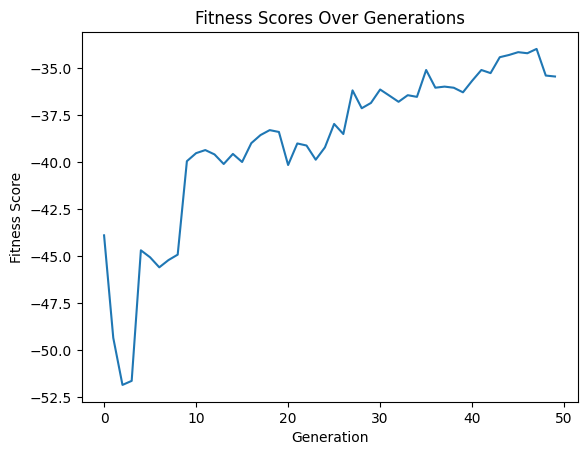

In [121]:
plt.plot(fitness_history)
plt.title('Fitness Scores Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.show()

In [122]:
silhouette_avg = silhouette_score(X, best_solution[:-1])
db_score = davies_bouldin_score(X, best_solution[:-1])
ch_score = calinski_harabasz_score(X, best_solution[:-1])
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_score}")
print(f"Calinski-Harabasz Index: {ch_score}")

Silhouette Score: 0.04360983034413332
Davies-Bouldin Index: 3.367336844450083
Calinski-Harabasz Index: 30.200780373018137


In [99]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(actual_labels, best_solution[:-1])

# Calculate the ratio of correct predictions
correct_ratio = accuracy

print("Correctly Predicted Ratio:", correct_ratio)

Correctly Predicted Ratio: 0.18791946308724833


Comparison DataFrame:
    Actual  Predicted
0       0          1
1       0          3
2       0          3
3       0          2
4       0          2


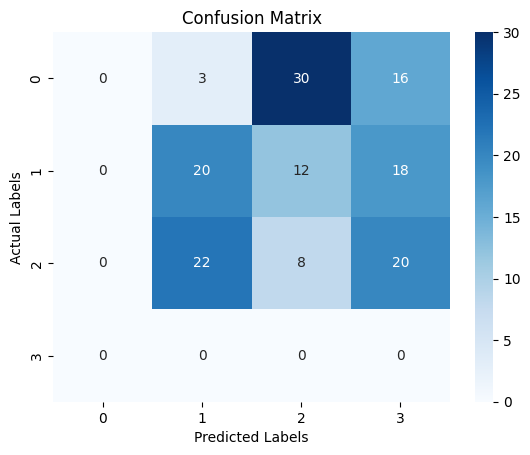

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
comparison_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': best_solution[:-1]})

# Display the first few rows of the comparison DataFrame
print("Comparison DataFrame:\n", comparison_df.head())

# Display confusion matrix using seaborn heatmap
conf_matrix = confusion_matrix(actual_labels, best_solution[:-1])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels='auto', yticklabels='auto')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

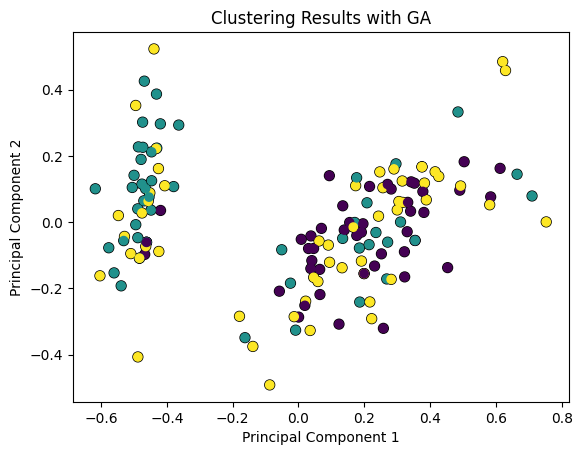

In [73]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=actual_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Clustering Results with GA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_solution[:-1])
plt.show()

Accuracy Score of KMeans: 0.11409395973154363


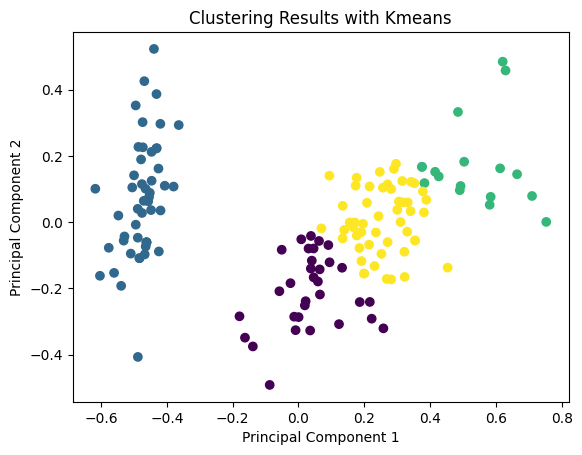

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto').fit(X_pca)
kmeans_labels = kmeans.labels_

if actual_labels is not None:
    accuracy_kmeans = accuracy_score(actual_labels, kmeans_labels)
    print("Accuracy Score of KMeans:", accuracy_kmeans)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.title('Clustering Results with Kmeans')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Comparison with k-means
"""
In this genetic algorithm, clusters are represented by chromosomes, and the operators (crossover and mutation)
are employed to evolve better clustering solutions. The objective function measures the quality of clusters based
on the sum of pairwise Euclidean distances within each cluster.

Compared to k-means:
- Genetic Algorithm:
    - Pros: Can handle non-convex clusters, less sensitive to initialization.
    - Cons: Computational overhead, potential for premature convergence, not guaranteed to find global optimum.

- K-means:
    - Pros: Fast convergence, often finds good solutions.
    - Cons: Sensitive to initialization, limited to convex clusters.

Both approaches have their strengths and weaknesses, and the choice depends on the nature of the data and the
desired characteristics of the clustering.

"""

# Analysis of Results and Discussion of Challenges
"""
Results:
- The algorithm provides a clustering solution represented by the 'best_solution'.
- The clusters are formed based on the genetic algorithm's evolution over generations.

Challenges and Limitations:
- The genetic algorithm may not always converge to the global optimum due to its stochastic nature.
- The effectiveness of the algorithm is influenced by parameters such as population size and the number of generations.
- Fine-tuning these parameters can be challenging and might require additional optimization.

Organizational Notes:
- The code is structured with clear function definitions and comments for ease of understanding.
- Each function serves a specific purpose, enhancing modularity and readability.

Randomness in Genetic Algorithms:
- Genetic algorithms inherently have elements of randomness.
- Results may vary between runs due to the stochastic nature of the operators and the initial population.

Verification of Implementation Goals:
- The implementation meets the goals outlined in the project, including initialization, operators, objective function,
  comparison with k-means, results analysis, and addressing the stochastic nature of genetic algorithms.

"""

